In [48]:
# Import the modules
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 1. ETL Workflow

## Extract:

In [33]:
# Read in the CSV file as a Pandas DataFrame
file_path = Path('dataset/spotify_youtube.csv')
spotify_youtube_df = pd.read_csv(file_path)

# # Display sample data
spotify_youtube_df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


## Transform:

In [34]:
# Drop unnecessary first row
spotify_youtube_df = spotify_youtube_df.drop(spotify_youtube_df.columns[0], axis=1)

# Check dataframe
spotify_youtube_df.head() 

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [35]:
# Convert column headers to lowercase for consistency and readability
spotify_youtube_df.columns = spotify_youtube_df.columns.str.lower()

# Check dataframe
spotify_youtube_df.head()

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,...,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [36]:
# Engineer new features
# Create engagement to measure total song activity
spotify_youtube_df['engagement'] = spotify_youtube_df['views'] + spotify_youtube_df['stream']

# Create content ratio to measure YouTube popularity for each song
spotify_youtube_df['youtube popularity'] = spotify_youtube_df['likes'] / spotify_youtube_df['views']

# Check dataframe
spotify_youtube_df.head()

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,...,channel,views,likes,comments,description,licensed,official_video,stream,engagement,youtube popularity
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09,1.733790e+09,0.008970
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08,3.820954e+08,0.014985
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07,7.149852e+07,0.033449
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08,6.464185e+08,0.008446
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08,1.235741e+09,0.010020


In [37]:
# Transform album_type, licensed, and official_video columns to numerical values for machine learning compatability
# Replace values in 'album_type' with numerical representations
spotify_youtube_df['album_type'] = spotify_youtube_df['album_type'].replace({'album': 0, 'single': 1, 'other': 2})

# Convert 'licensed' and 'official_video' from boolean to integers
# 1 = True (licensed/official video), 0 = False (not licensed/not official video)
spotify_youtube_df['licensed'] = spotify_youtube_df['licensed'].fillna(0).astype(int)
spotify_youtube_df['official_video'] = spotify_youtube_df['official_video'].fillna(0).astype(int)
spotify_youtube_df

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,...,channel,views,likes,comments,description,licensed,official_video,stream,engagement,youtube popularity
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,0,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1,1,1.040235e+09,1.733790e+09,0.008970
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,0,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1,1,3.100837e+08,3.820954e+08,0.014985
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),1,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1,1,6.306347e+07,7.149852e+07,0.033449
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,0,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1,1,4.346636e+08,6.464185e+08,0.008446
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,0,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1,1,6.172597e+08,1.235741e+09,0.010020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,1,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,...,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,1,1,9.227144e+06,9.298822e+06,0.015528
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,1,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,...,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,1,1,1.089818e+07,1.106292e+07,0.012256
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,1,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,...,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,1,1,6.226110e+06,6.261756e+06,0.009230
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,1,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,...,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,1,1,6.873961e+06,6.880494e+06,0.013470


In [38]:
# Summary Statistics
spotify_youtube_df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,views,likes,comments,licensed,official_video,stream,engagement,youtube popularity
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,20718.000000,20718.000000,2.014200e+04,1.969200e+04,20176.000000
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,0.682498,0.758905,1.359422e+08,2.319717e+08,0.012249
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,0.465516,0.427758,2.441321e+08,4.679789e+08,0.011308
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,6.574000e+03,7.020000e+03,0.000000
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,0.000000,1.000000,1.767486e+07,2.649538e+07,0.005679
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,1.000000,1.000000,4.968298e+07,7.922365e+07,0.008783
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.000000,1.000000,1.383581e+08,2.264282e+08,0.015006
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,1.000000,1.000000,3.386520e+09,9.586248e+09,0.249204


Due to the counts of the different columns being different, we wish to eliminate any rows that may contain NaN values

In [39]:
spotify_youtube_df_cleaned = spotify_youtube_df.dropna(how='any')
spotify_youtube_df_cleaned

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,...,channel,views,likes,comments,description,licensed,official_video,stream,engagement,youtube popularity
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,0,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1,1,1.040235e+09,1.733790e+09,0.008970
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,0,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,1,1,3.100837e+08,3.820954e+08,0.014985
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),1,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,1,1,6.306347e+07,7.149852e+07,0.033449
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,0,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,1,1,4.346636e+08,6.464185e+08,0.008446
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,0,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,1,1,6.172597e+08,1.235741e+09,0.010020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,1,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,...,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,1,1,9.227144e+06,9.298822e+06,0.015528
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,1,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,...,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,1,1,1.089818e+07,1.106292e+07,0.012256
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,1,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,...,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,1,1,6.226110e+06,6.261756e+06,0.009230
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,1,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,...,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,1,1,6.873961e+06,6.880494e+06,0.013470


In [40]:
spotify_youtube_df_cleaned.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,views,likes,comments,licensed,official_video,stream,engagement,youtube popularity
count,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04,19170.000000,19170.000000,1.917000e+04,1.917000e+04,19170.000000
mean,0.621178,0.636150,5.292645,-7.615305,0.094944,0.287817,0.055476,0.191322,0.528267,120.607345,2.247612e+05,9.719768e+07,6.823531e+05,2.838656e+04,0.714763,0.793949,1.382746e+08,2.354723e+08,0.012169
std,0.165533,0.213439,3.579947,4.617605,0.104931,0.285630,0.192768,0.165217,0.244996,29.588308,1.278468e+05,2.799997e+08,1.820550e+06,1.977979e+05,0.451539,0.404478,2.477309e+08,4.728529e+08,0.011169
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,6.574000e+03,7.020000e+03,0.000000
25%,0.520000,0.510000,2.000000,-8.745000,0.035700,0.043600,0.000000,0.094100,0.338000,96.997500,1.802670e+05,2.070213e+06,2.447350e+04,5.830000e+02,0.000000,1.000000,1.786937e+07,2.692587e+07,0.005657
50%,0.639000,0.667000,5.000000,-6.504000,0.050600,0.188000,0.000002,0.125000,0.535000,119.969000,2.133210e+05,1.568959e+07,1.332770e+05,3.515500e+03,1.000000,1.000000,5.037938e+07,8.064792e+07,0.008727
75%,0.742000,0.798000,8.000000,-4.918500,0.104000,0.469000,0.000436,0.234000,0.724000,139.946000,2.519630e+05,7.369040e+07,5.423462e+05,1.494100e+04,1.000000,1.000000,1.407579e+08,2.307493e+08,0.014919
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,1.000000,1.000000,3.386520e+09,9.586248e+09,0.249204


Because of the large disparity in values between features, we have decided that we should scale the values in the millions down.

In [41]:
# Isolate compatible columns
feature_set = spotify_youtube_df_cleaned[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'views', 'likes', 'comments', 'licensed', 'official_video', 'stream', 'engagement', 'youtube popularity']]

# Initialize scaler
scaler = StandardScaler()

# Scale values
scaled_features = scaler.fit_transform(feature_set)
scaled_df = pd.DataFrame(scaled_features, columns=feature_set.columns)
scaled_df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,views,likes,comments,licensed,official_video,stream,engagement,youtube popularity
0,1.189054,0.322582,0.197593,0.202774,0.782026,-0.978411,-0.275704,2.552328,0.994869,0.606730,-0.016592,2.129906,3.042315,0.715499,0.631717,0.509438,3.640982,3.168759,-0.286494
1,0.331194,0.313212,0.756275,0.389889,-0.617031,-0.703433,-0.284227,-0.877787,1.321413,-0.941151,-0.192331,-0.089953,0.217948,0.013228,0.631717,0.509438,0.693549,0.310090,0.252158
2,0.445978,1.343976,-1.199112,0.798120,-0.407363,-0.858882,-0.044488,-0.455907,0.092790,-0.425630,-0.075179,-0.317018,-0.219836,-0.106109,0.631717,0.509438,-0.303608,-0.346785,1.905326
3,0.409730,0.481882,-0.919771,0.390972,-0.657058,-1.007627,2.352753,-0.770652,0.202999,-0.006230,0.071226,0.409144,0.607647,0.135710,0.631717,0.509438,1.196446,0.869101,-0.333334
4,0.252658,0.271044,1.314958,-0.219101,0.724844,-0.919102,-0.287791,-0.735546,-0.013337,1.600189,0.908602,1.861777,3.029364,0.644834,0.631717,0.509438,1.933540,2.115445,-0.192421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19165,-0.236685,1.358032,-0.081748,0.275324,-0.592252,0.560822,-0.287791,-0.650202,0.529543,-1.034400,-1.017605,-0.346888,-0.374204,-0.143517,0.631717,0.509438,-0.520932,-0.478329,0.300715
19166,-0.544789,1.404884,-0.361089,1.262442,0.400812,-0.909649,-0.287791,-0.599358,0.525461,1.833936,-0.578084,-0.346556,-0.373707,-0.143517,0.631717,0.509438,-0.514186,-0.474598,0.007731
19167,-1.076421,0.908244,-0.361089,0.635910,-0.288233,-0.922603,-0.287791,-0.225901,-0.446008,1.614891,-0.687710,-0.347017,-0.374635,-0.143517,0.631717,0.509438,-0.533046,-0.484752,-0.263208
19168,-1.233494,0.613070,1.035617,0.782094,3.088374,0.238719,-0.192338,-0.504330,0.043808,1.175179,-0.910287,-0.347121,-0.374767,-0.143517,0.631717,0.509438,-0.530431,-0.483444,0.116473


## EDA: Visualizations

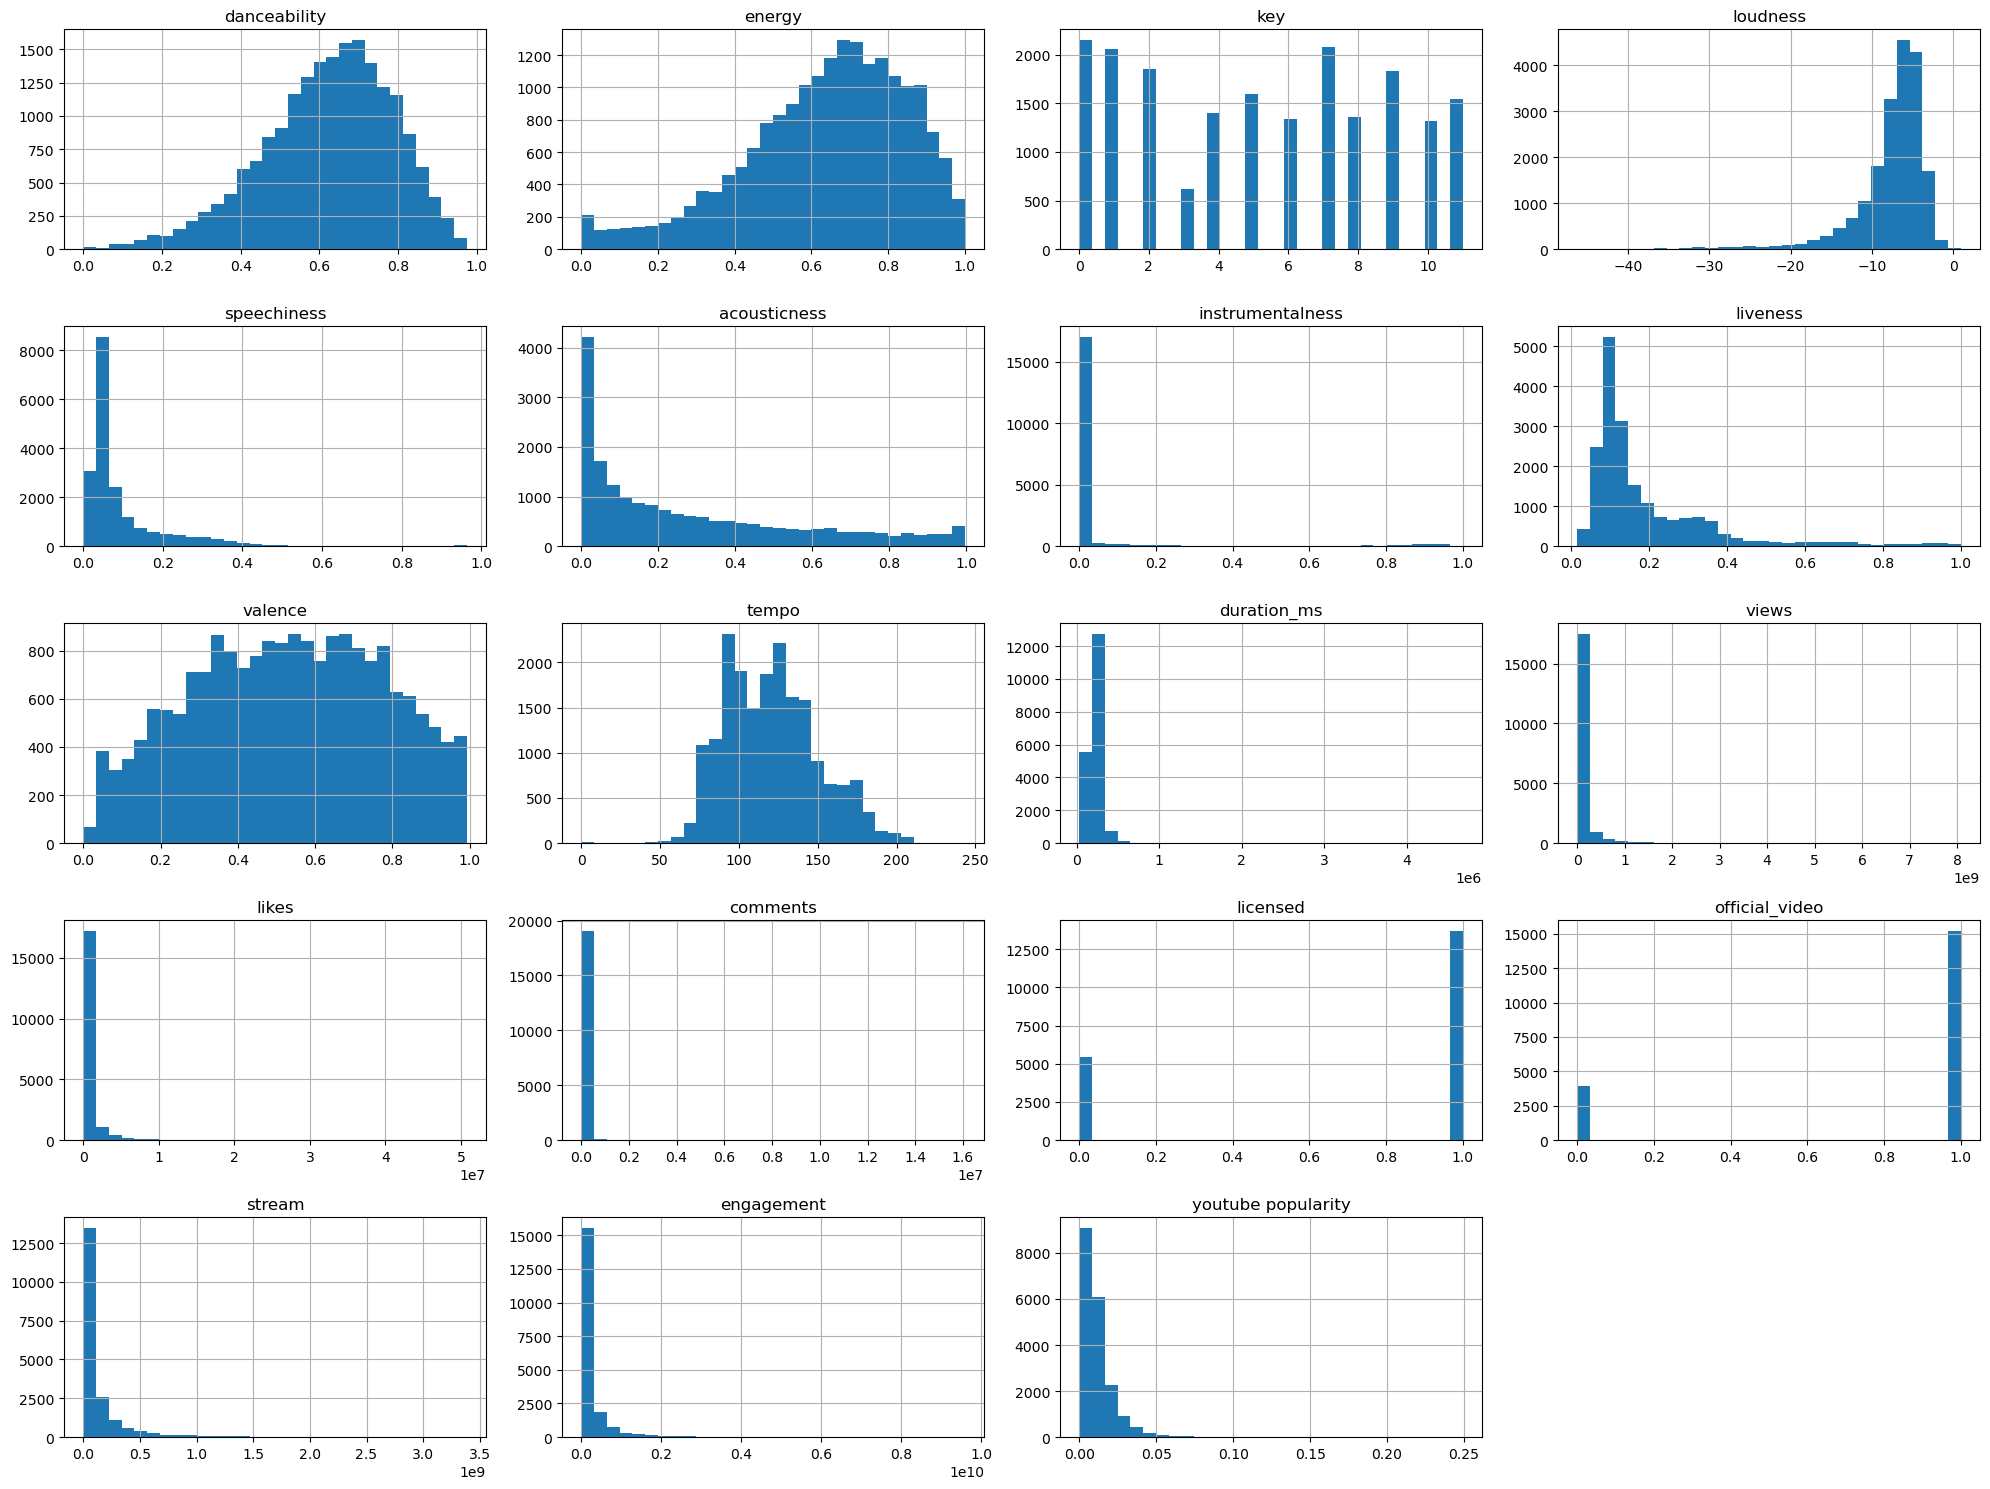

In [51]:
# Plot histograms
spotify_youtube_df_cleaned.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

### Heat Map

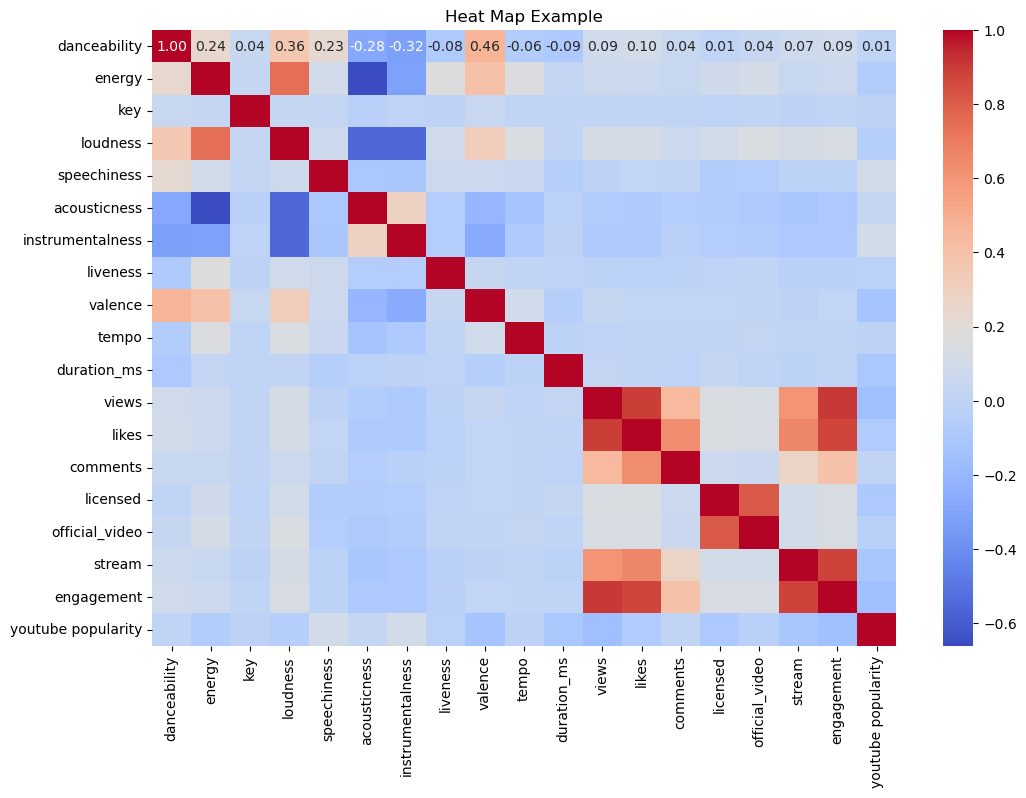

In [44]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heat Map Example')
plt.show()

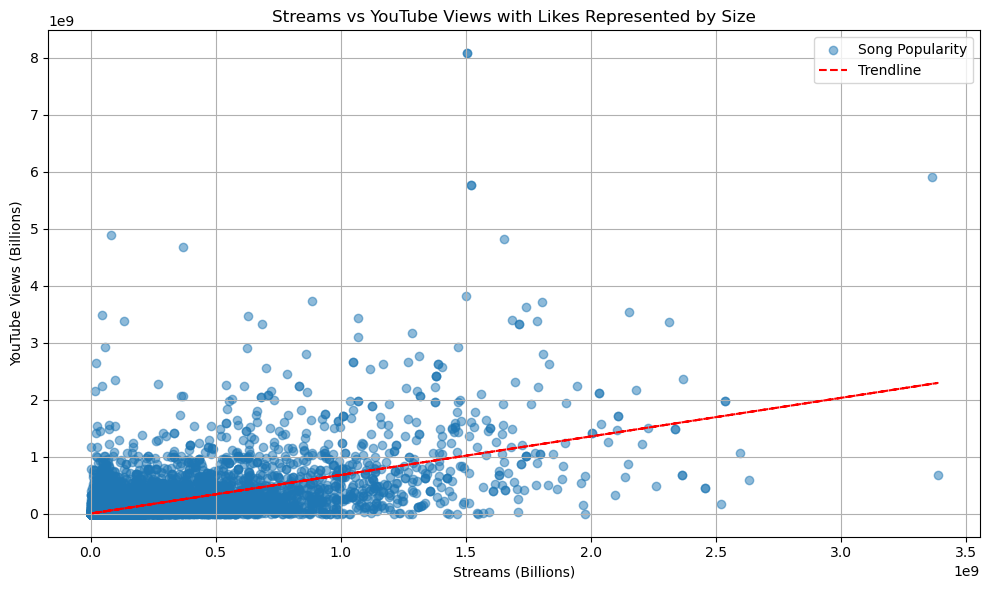

In [18]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sizes = spotify_youtube_df['likes'] / 10000  # Scale down 'likes' for better visualization

plt.scatter(spotify_youtube_df['stream'], spotify_youtube_df['views'], alpha=0.5, label='Song Popularity') #s=sizes, alpha=0.5, label='Song Popularity')

# Add trendline
z = np.polyfit(spotify_youtube_df['stream'], spotify_youtube_df['views'], 1)
p = np.poly1d(z)
plt.plot(spotify_youtube_df['stream'], p(spotify_youtube_df['stream']), "r--", label="Trendline")

# Add labels and title
plt.xlabel('Streams (Billions)')  # Label showing units in billions
plt.ylabel('YouTube Views (Billions)')  # Label showing units in billions
plt.title('Streams vs YouTube Views with Likes Represented by Size')
plt.legend()

# Add grid
plt.grid(True)  # This adds a grid to the plot

# Show plot
plt.tight_layout()
plt.show()

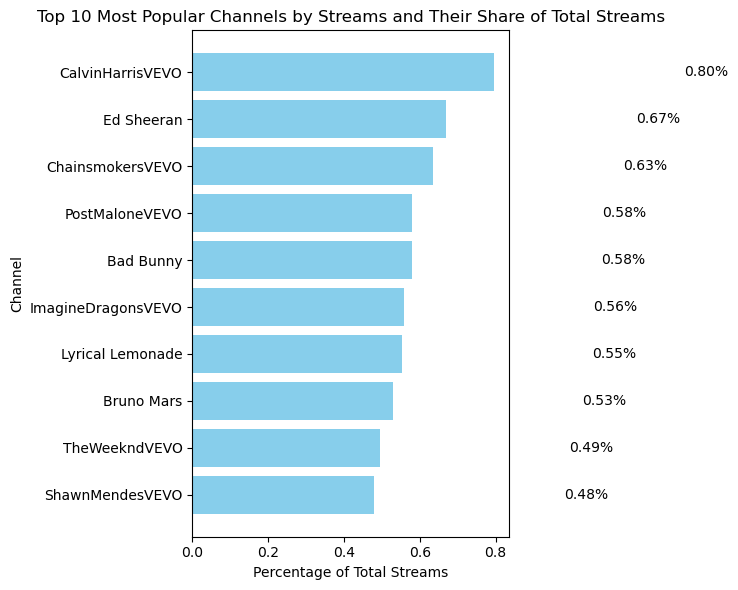

In [19]:
# Assuming 'spotify_youtube_df' is your DataFrame containing 'channel' and 'streams' columns
# First, group by channel and sum their total streams
channel_streams = spotify_youtube_df.groupby('channel')['stream'].sum().reset_index()

# Sort the channels by the total streams in descending order and select the top 10
top_10_channels = channel_streams.sort_values(by='stream', ascending=False).head(10)

# Calculate the percentage of total streams for each of the top 10 channels
total_streams = spotify_youtube_df['stream'].sum()
top_10_channels['percent_of_total'] = (top_10_channels['stream'] / total_streams) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_channels['channel'], top_10_channels['percent_of_total'], color='skyblue')
plt.xlabel('Percentage of Total Streams')
plt.ylabel('Channel')
plt.title('Top 10 Most Popular Channels by Streams and Their Share of Total Streams')
plt.gca().invert_yaxis()  # Invert y-axis so that the highest value is at the top

# Add percentage labels to each bar
for index, value in enumerate(top_10_channels['percent_of_total']):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')

plt.tight_layout()
plt.show()

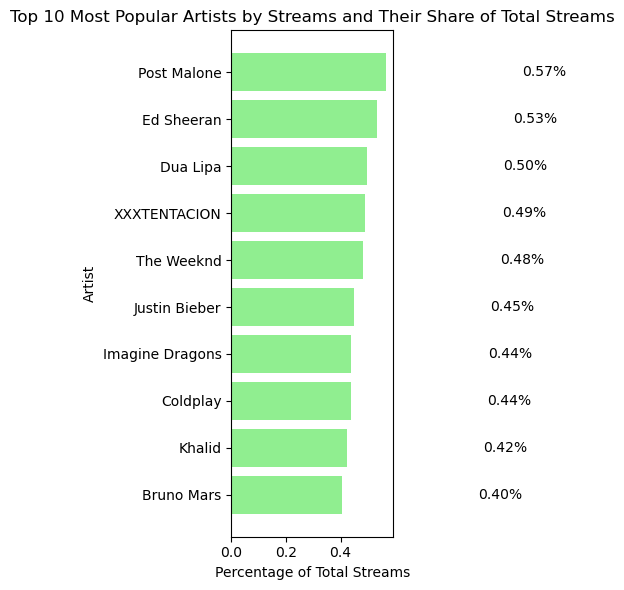

In [20]:
# Assuming 'spotify_youtube_df' is your DataFrame containing 'artist' and 'stream' columns
# First, group by artist and sum their total streams
artist_streams = spotify_youtube_df.groupby('artist')['stream'].sum().reset_index()

# Sort the artists by the total streams in descending order and select the top 10
top_10_artists = artist_streams.sort_values(by='stream', ascending=False).head(10)

# Calculate the percentage of total streams for each of the top 10 artists
total_streams = spotify_youtube_df['stream'].sum()
top_10_artists['percent_of_total'] = (top_10_artists['stream'] / total_streams) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_artists['artist'], top_10_artists['percent_of_total'], color='lightgreen')
plt.xlabel('Percentage of Total Streams')
plt.ylabel('Artist')
plt.title('Top 10 Most Popular Artists by Streams and Their Share of Total Streams')
plt.gca().invert_yaxis()  # Invert y-axis so that the highest value is at the top

# Add percentage labels to each bar
for index, value in enumerate(top_10_artists['percent_of_total']):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')

plt.tight_layout()
plt.show()

# Models

In [45]:
# Assume df is your DataFrame and 'target' is your target variable
X = spotify_youtube_df_cleaned[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]  # Replace with your actual feature names
y = spotify_youtube_df_cleaned['engagement']  # Replace with your actual target variable

In [46]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model 1: Linear Regression

## Model 1: Logistic Regression

In [49]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

c:\Users\drpon\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

## Model 2: Random Forest